# 05_scATAC seq MPPs integrate with RNAseq

analysis of scATAC seq in MPPs using Signac

used this docker image

docker run 
--rm 
-d 
--name signac 
-p 8880:8888 
-e JUPYTER_ENABLE_LAB=YES 
-v /Users/efast/Documents/:/home/jovyan/work 
signac_seurat:vs5

In [1]:
library(Signac)
library(Seurat)
library(GenomeInfoDb)
library(EnsDb.Mmusculus.v79)
library(ggplot2)
library(JASPAR2018)
library(TFBSTools)
#library(BSgenome.Mmusculus.UCSC.mm10)
library(tidyverse)

set.seed(1234)

Warning message:
“package ‘Seurat’ was built under R version 3.6.2”Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which, which.max, which.min

Loading required package: S4Vectors
Loading req

In [2]:
pbmc <- readRDS("./sc_objects/scATAC_MPP_processed_chromvar.rds")

In [3]:
library(BSgenome.Mmusculus.UCSC.mm10)

Loading required package: BSgenome
Loading required package: Biostrings
Loading required package: XVector

Attaching package: 'XVector'

The following object is masked from 'package:purrr':

    compact


Attaching package: 'Biostrings'

The following object is masked from 'package:base':

    strsplit

Loading required package: rtracklayer


In [5]:
DefaultAssay(pbmc) <- 'RNA'
pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.10, logfc.threshold = 0.25)

Calculating cluster 0
Calculating cluster 1
Calculating cluster 2
Calculating cluster 3
Calculating cluster 4
Calculating cluster 5
Calculating cluster 6
Calculating cluster 7
Calculating cluster 8
Calculating cluster 9
Calculating cluster 10
Calculating cluster 11
Calculating cluster 12


In [6]:
pbmc.markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)

p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
5.330333e-13,0.2638077,0.440,0.298,1.148047e-08,8,Gypc
6.129336e-09,0.2638489,0.443,0.344,1.320136e-04,8,Rab27b
1.399723e-20,0.2803270,0.757,0.259,3.014723e-16,9,Ncf4
2.511888e-10,0.3505893,0.905,0.530,5.410105e-06,9,Atp8b4
4.068553e-09,0.2796663,0.959,0.675,8.762850e-05,9,Fndc3b
5.581129e-09,0.3064928,0.851,0.525,1.202064e-04,9,Vav2
6.898352e-48,0.5242206,0.619,0.066,1.485767e-43,10,Lilrb4
2.421689e-27,0.7707623,0.643,0.130,5.215835e-23,10,Nlrp3
5.276123e-25,0.5917103,0.619,0.121,1.136371e-20,10,Cyp11a1


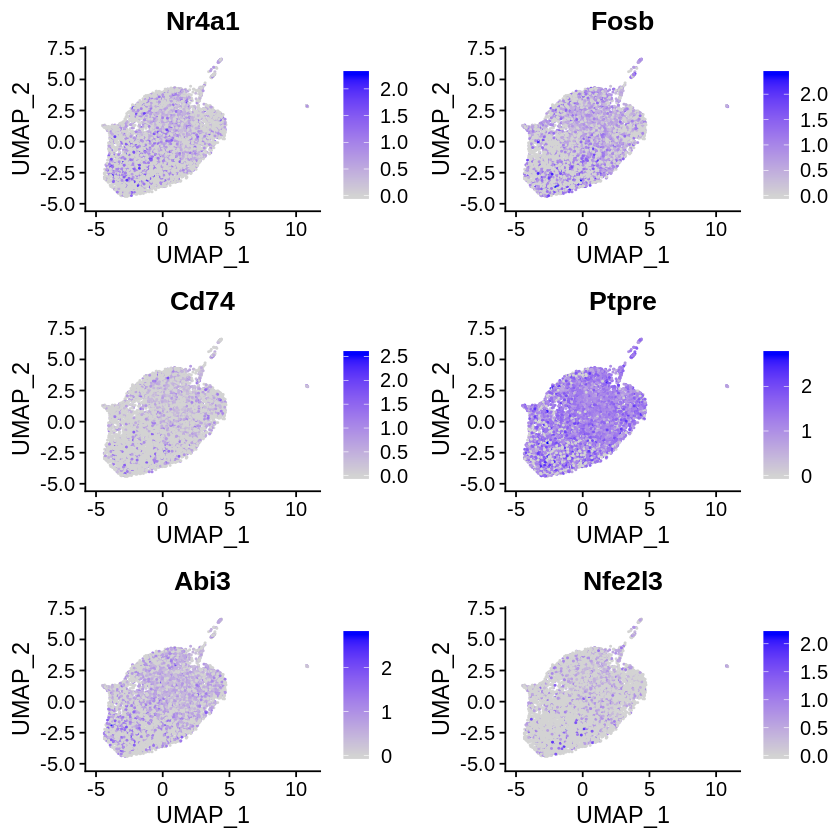

In [7]:
DefaultAssay(pbmc) <- 'RNA'
FeaturePlot(
  object = pbmc,
  features = c('Nr4a1', 'Fosb', 'Cd74','Ptpre', 'Abi3', 'Nfe2l3'),
  ncol = 2,
)

## extra preprocessing steps based on Seurat tutorial

https://satijalab.org/seurat/v3.1/atacseq_integration_vignette.html

In [8]:
DefaultAssay(pbmc) <- 'RNA'

pbmc <- FindVariableFeatures(pbmc)
pbmc <- NormalizeData(pbmc)
pbmc <- ScaleData(pbmc)

Centering and scaling data matrix


In [9]:
# read RNA data

pbmc.rna <- ReadH5AD(file = "./sc_objects/MPP_preprocessed_old_scanpy.h5ad", layers=FALSE)

Pulling expression matrices and metadata
Data is scaled
Merging feature-level metadata dataframes
Creating assay object
Storing X as scale.data and raw as data
Setting highly variable features
Pulling dimensional reduction information
Pulling cell embeddings
Pulling feature loadings
Warning message:
"No columnames present in cell embeddings, setting to 'PC_1:50'"Warning message:
"No columnames present in cell embeddings, setting to 'UMAP_1:2'"Assembling Seurat object
Finding nearest neighbor graph
Warning message:
"Adding a Graph without an assay associated with it"Not pulling layers


In [10]:
pbmc.rna$tech <- "rna"

Warning message:
"Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session."

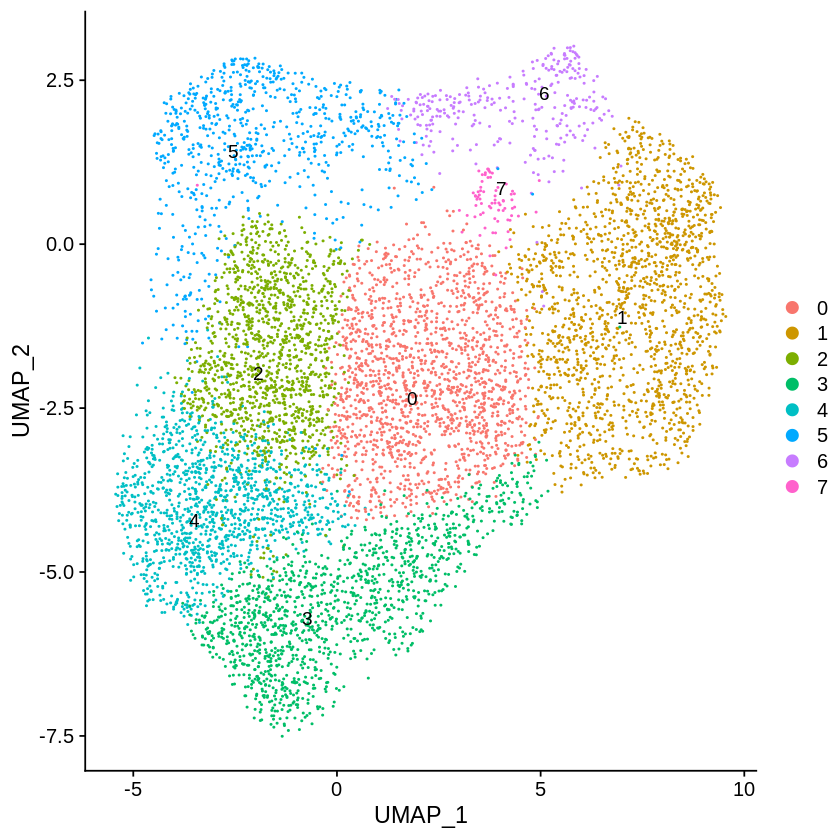

In [11]:
DimPlot(pbmc.rna, group.by = "leiden", label = TRUE, repel = TRUE)

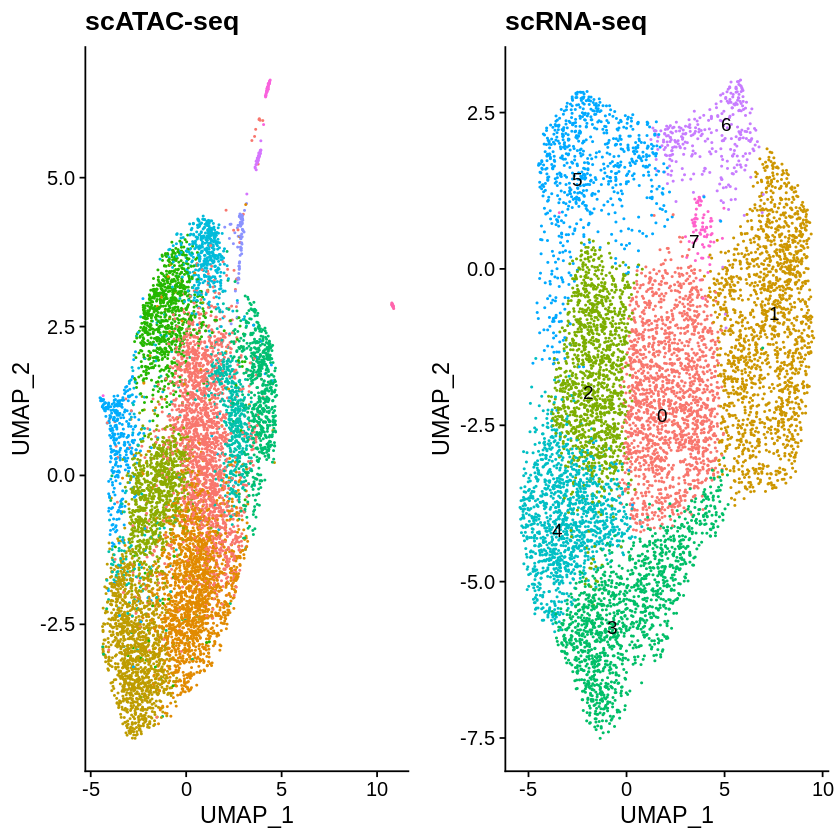

In [12]:
p1 <- DimPlot(pbmc, reduction = "umap") + NoLegend() + ggtitle("scATAC-seq")
p2 <- DimPlot(pbmc.rna, group.by = "leiden", label = TRUE, repel = TRUE) + NoLegend() + ggtitle("scRNA-seq")
CombinePlots(plots = list(p1, p2))

In [13]:
pbmc

An object of class Seurat 
200031 features across 8770 samples within 3 assays 
Active assay: RNA (21538 features)
 2 other assays present: peaks, chromvar
 2 dimensional reductions calculated: lsi, umap

In [14]:
pbmc.rna

An object of class Seurat 
13827 features across 8191 samples within 1 assay 
Active assay: RNA (13827 features)
 2 dimensional reductions calculated: pca, umap

In [15]:
pbmc.rna <- FindVariableFeatures(pbmc.rna, selection.method = "vst", nfeatures = 2000)

Warning message in FindVariableFeatures.Assay(object = assay.data, selection.method = selection.method, :
"selection.method set to 'vst' but count slot is empty; will use data slot instead"

In [16]:
transfer.anchors <- FindTransferAnchors(reference = pbmc.rna, query = pbmc, 
                                        features = VariableFeatures(object = pbmc.rna), 
                                        reference.assay = "RNA", query.assay = "RNA", reduction = "cca")

Warning message:
"Adding a Graph without an assay associated with it"Warning message:
"Adding a Graph without an assay associated with it"Running CCA
Merging objects
Finding neighborhoods
Finding anchors
	Found 25594 anchors
Filtering anchors
	Retained 1317 anchors
Extracting within-dataset neighbors


In [17]:
# had to make leiden categories from integer into characters

pbmc.rna$leiden <- as.character(pbmc.rna$leiden)

celltype.predictions <- TransferData(anchorset = transfer.anchors, refdata = pbmc.rna$leiden, 
    weight.reduction = pbmc[["lsi"]])
pbmc <- AddMetaData(pbmc, metadata = celltype.predictions)

Finding integration vectors
Finding integration vector weights
Predicting cell labels


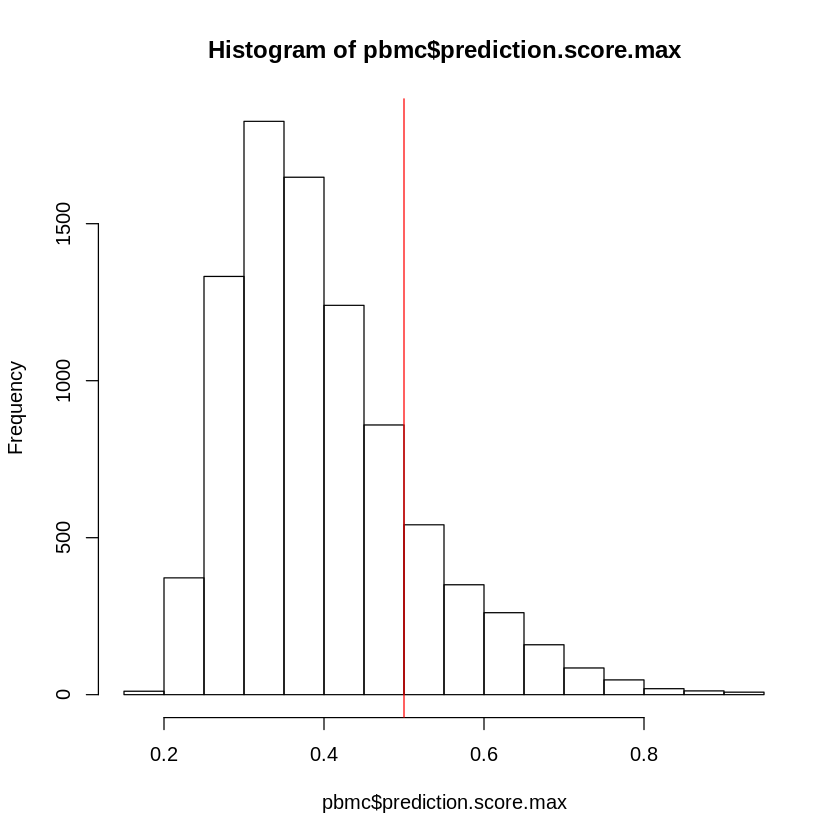

In [18]:
hist(pbmc$prediction.score.max)
abline(v = 0.5, col = "red")

In [19]:
# over 25% is the best cutoff
table(pbmc$prediction.score.max > 0.25)


FALSE  TRUE 
  383  8387 

Warning message:
"Removed 8387 rows containing missing values (geom_text_repel)."

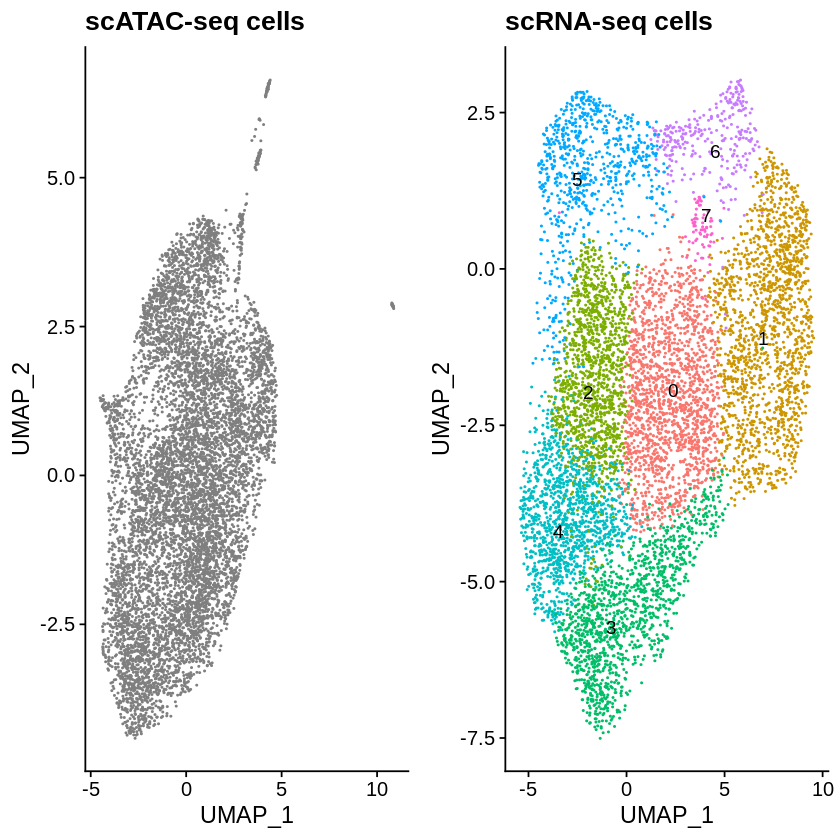

In [20]:
pbmc.filtered <- subset(pbmc, subset = prediction.score.max > 0.25)
pbmc.filtered$predicted.id <- factor(pbmc.filtered$predicted.id, levels = levels(pbmc.rna))  # to make the colors match
p1 <- DimPlot(pbmc.filtered, group.by = "predicted.id", label = TRUE, repel = TRUE) + ggtitle("scATAC-seq cells") + 
    NoLegend() + scale_colour_hue(drop = FALSE)
p2 <- DimPlot(pbmc.rna, group.by = "leiden", label = TRUE, repel = TRUE) + ggtitle("scRNA-seq cells") + 
    NoLegend()
CombinePlots(plots = list(p1, p2))

In [21]:
# note that we restrict the imputation to variable genes from scRNA-seq, but could impute the
# full transcriptome if we wanted to
genes.use <- VariableFeatures(pbmc.rna)
refdata <- GetAssayData(pbmc.rna, assay = "RNA", slot = "data")[genes.use, ]

# refdata (input) contains a scRNA-seq expression matrix for the scRNA-seq cells.  imputation
# (output) will contain an imputed scRNA-seq matrix for each of the ATAC cells
imputation <- TransferData(anchorset = transfer.anchors, refdata = refdata, weight.reduction = pbmc[["lsi"]])

# this line adds the imputed data matrix to the pbmc.atac object
pbmc[["RNA_i"]] <- imputation
coembed <- merge(x = pbmc.rna, y = pbmc)

# Finally, we run PCA and UMAP on this combined object, to visualize the co-embedding of both
# datasets
coembed <- ScaleData(coembed, features = genes.use, do.scale = FALSE)
coembed <- RunPCA(coembed, features = genes.use, verbose = FALSE)
coembed <- RunUMAP(coembed, dims = 1:30)
coembed$leiden <- ifelse(!is.na(coembed$leiden), coembed$leiden, coembed$predicted.id)

Finding integration vectors
Finding integration vector weights
Transfering 2000 features onto reference data
Warning message:
"Keys should be one or more alphanumeric characters followed by an underscore, setting key from rna_i_ to rnai_"Centering data matrix
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"02:33:18 UMAP embedding parameters a = 0.9922 b = 1.112
02:33:18 Read 16961 rows and found 30 numeric columns
02:33:18 Using Annoy for neighbor search, n_neighbors = 30
02:33:18 Building Annoy index with metric = cosine, n_trees = 50
0%   10   20   30   40   50   60   70   80   90   100%
[----|----|----|----|----|----|----|----|----|----|
**************************************************|
02:33:40 Writing NN index file to temp file /tmp/RtmpIbCyN9/fi

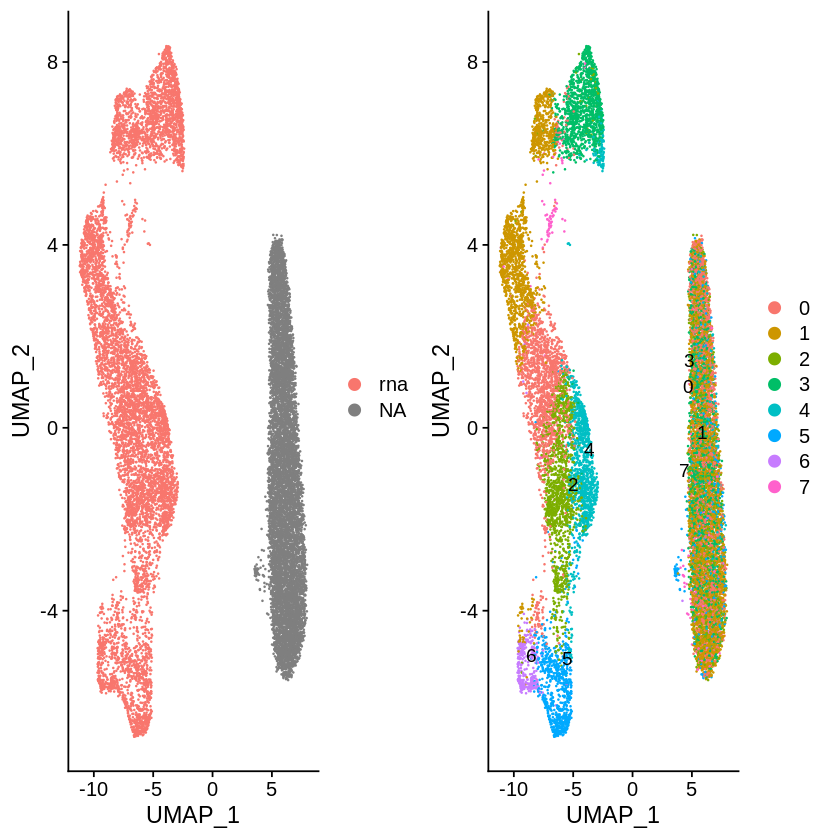

In [22]:
p1 <- DimPlot(coembed, group.by = "tech")
p2 <- DimPlot(coembed, group.by = "leiden", label = TRUE, repel = TRUE)
CombinePlots(list(p1, p2))

Warning message:
"Removed 8 rows containing missing values (geom_text_repel)."

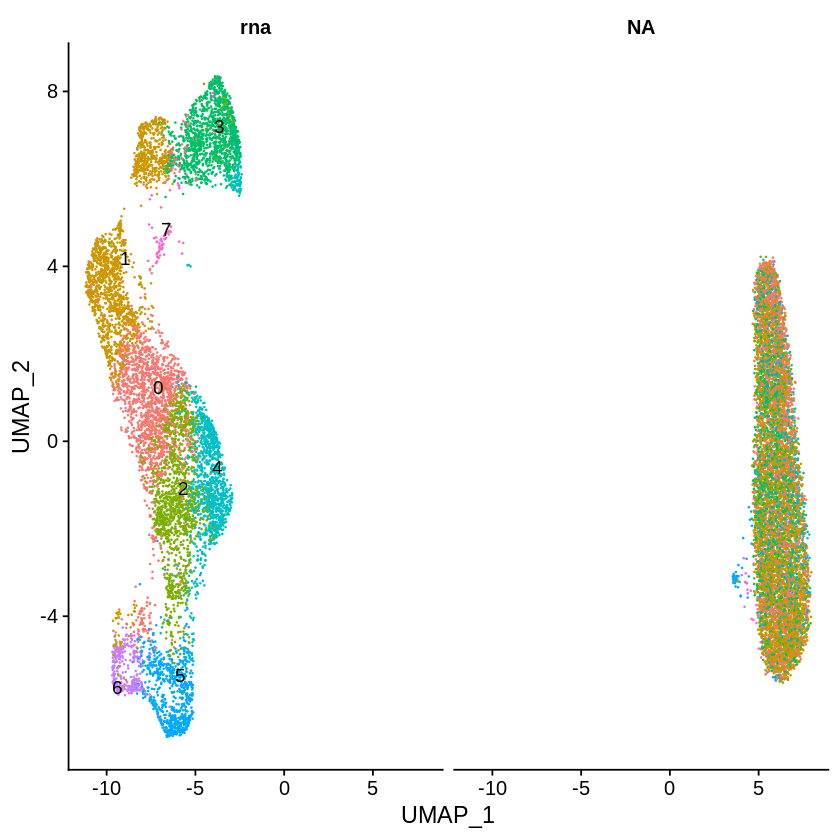

In [23]:
DimPlot(coembed, split.by = "tech", group.by = "leiden", label = TRUE, repel = TRUE) + NoLegend()

#### also MPPs cannot be embedded easily